### Neighbourhood Segmentation and Clustering using Foursquare API with Toronto Dataset

###### Lets first install all the necessary elements

In [98]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

!pip install geocoder
import geocoder

!pip install geopy
from geopy.geocoders import Nominatim

import time
print('Done')

Done


In [99]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.colors as colors
print('Downloaded')

Downloaded


In [100]:
import requests
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import folium
print('Done')

Done


### Toronto Dataset

#### Here we will be first cleaning the dataset to see only Toronto neighborhoods and then adding the latitude and longtitude to get the neighbrhoods on the map.

In [101]:
link = 'http://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
df = pd.read_html(link)
df = df[0]
df.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [102]:
df.drop(df[df['Borough'] == 'Not assigned'].index, 0, inplace=True)
df.head()

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [103]:
df.shape

(103, 3)

#### In my case the dataset with longitude and latitude was provided in a lab. So i am gonna gownload and merge it with initial dataset.

In [104]:
df2 = pd.read_csv('https://cocl.us/Geospatial_data')
df2

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [105]:
type(df2['Latitude'])

pandas.core.series.Series

##### As we can see, the data under Latitude column is series and not an object. Otherwise we would have to convert it by using astype method, or find a dataset with integer numbers.
##### Now we have to create a dataframe, which consist of only Toronto related neighborhoods and then merge it with previous dataset.

In [106]:
new_df = df[df['Borough'].str.contains("Toronto")]
new_df.head()

,Postal Code,Borough,Neighbourhood
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
13,M5B,Downtown Toronto,"Garden District, Ryerson"
22,M5C,Downtown Toronto,St. James Town
30,M4E,East Toronto,The Beaches


In [107]:
df3 = pd.merge(new_df, df2, 'left', 'Postal Code')
df3.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031


###### Now we have to visualize our dataframe in order to see the neighborhoods on the interactive map, created with a help of folium library.

In [108]:
map_toronto = folium.Map(location=[43.6532, -79.3832], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df3['Latitude'], df3['Longitude'], df3['Borough'], df3['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### Foursquare API

In [109]:
CLIENT_ID = '4OEAGM5N5Z3MKSDDVW0ILC05ECHQ5FHWLL1WSQXQCDDV0ABG' # your Foursquare ID
CLIENT_SECRET = 'DQKKA5J2OY45PSXCQHY3QRBTNGHSRBFMJ3SDLJVZYZGLK0RL' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4OEAGM5N5Z3MKSDDVW0ILC05ECHQ5FHWLL1WSQXQCDDV0ABG
CLIENT_SECRET:DQKKA5J2OY45PSXCQHY3QRBTNGHSRBFMJ3SDLJVZYZGLK0RL


In [110]:
neighborhood_latitude = df3.Latitude.values[0] # neighborhood latitude value
neighborhood_longitude = df3.Longitude.values[0] # neighborhood longitude value

neighborhood_name = new_df.Neighbourhood.values[0] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Regent Park, Harbourfront are 43.6542599, -79.3606359.


In [111]:
import json
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=4OEAGM5N5Z3MKSDDVW0ILC05ECHQ5FHWLL1WSQXQCDDV0ABG&client_secret=DQKKA5J2OY45PSXCQHY3QRBTNGHSRBFMJ3SDLJVZYZGLK0RL&v=20180605&ll=43.6542599,-79.3606359&radius=500&limit=100'

In [112]:
result = requests.get(url).json()
result

{'meta': {'code': 200, 'requestId': '60126b475047ce5dec0ae7a6'},
 'response': {'headerLocation': 'Corktown',
  'headerFullLocation': 'Corktown, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 45,
  'suggestedBounds': {'ne': {'lat': 43.6587599045, 'lng': -79.3544279001486},
   'sw': {'lat': 43.6497598955, 'lng': -79.36684389985142}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '54ea41ad498e9a11e9e13308',
       'name': 'Roselle Desserts',
       'location': {'address': '362 King St E',
        'crossStreet': 'Trinity St',
        'lat': 43.653446723052674,
        'lng': -79.3620167174383,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.653446723052674,
          'lng': -79.3620167174383}],
        'distance': 143,
       

###### Here we have to explore the Toronto Neighborhood

In [113]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

###### Now we need to write the code to run the above function on each neighborhood and create a new dataframe called toronto_venues.

In [114]:
toronto_venues = getNearbyVenues(df3['Neighbourhood'], df3['Latitude'], df3['Longitude'])

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West, Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
R

###### Now lets see the amount of venues per each neighborhood

In [115]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,55,55,55,55,55,55
"Brockton, Parkdale Village, Exhibition Place",22,22,22,22,22,22
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",17,17,17,17,17,17
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",18,18,18,18,18,18
Central Bay Street,60,60,60,60,60,60
Christie,16,16,16,16,16,16
Church and Wellesley,78,78,78,78,78,78
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,34,34,34,34,34,34


In [116]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 236 uniques categories.


In [117]:
# one hot encoding
toronto_one_hot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_one_hot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_one_hot.columns[-1]] + list(toronto_one_hot.columns[:-1])
toronto_one_hot = toronto_one_hot[fixed_columns]

toronto_one_hot.head()

,Yoga Studio,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hospital,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Knitting Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Post Office,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [118]:
toronto_grouped = toronto_one_hot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hospital,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Knitting Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Post Office,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.018182,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.018182,0.036364,0.000000,0.000000,0.00,0.018182,0.018182,0.000000,0.036364,0.000000,0.000000,0.018182,0.000000,0.000000,0.000000,0.000000,0.018182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018182,0.00,0.0000,0.000000,0.036364,0.000000,0.000000,0.000000,0.000000,0.018182,0.054545,0.090909,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.018182,0.000000,0.018182,0.000000,0.000000,0.000000,0.018182,0.000000,0.000000,0.000000,0.000000,0.018182,0.000000,0.018

###### Ok, now as wee see the grouped rows per each neighborhood and the frequency of occurence per each category. So now our aim is to find out, what are the top common venues, based on frequency of occurence.

In [119]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0         Coffee Shop  0.09
1        Cocktail Bar  0.05
2  Seafood Restaurant  0.04
3              Bakery  0.04
4      Farmers Market  0.04


----Brockton, Parkdale Village, Exhibition Place----
            venue  freq
0            Café  0.14
1  Breakfast Spot  0.09
2     Coffee Shop  0.09
3       Pet Store  0.05
4    Intersection  0.05


----Business reply mail Processing Centre, South Central Letter Processing Plant Toronto----
         venue  freq
0  Yoga Studio  0.06
1      Brewery  0.06
2          Spa  0.06
3   Skate Park  0.06
4   Restaurant  0.06


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
              venue  freq
0   Airport Service  0.17
1    Airport Lounge  0.11
2  Airport Terminal  0.11
3             Plane  0.06
4           Airport  0.06


----Central Bay Street----
                venue  freq
0         Coffee Shop  0.18
1                Café  0.07
2  Ita

###### As we can see from data above, there is a huge demand on coffee shop, as there are coffee shops almost in each neighborhood. You can try the same with other venue, like shopping mall for instance. You will see on the map below, the amount of malls for each neighborhood for instance. While i have chosen to run the analysis for a Coffee shop. For instance, this information can be useful for Starbucks for example.

In [120]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [121]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Bakery,Beer Bar,Seafood Restaurant,Farmers Market,Restaurant,Cheese Shop,Jazz Club,Beach
1,"Brockton, Parkdale Village, Exhibition Place",Café,Breakfast Spot,Coffee Shop,Burrito Place,Restaurant,Italian Restaurant,Intersection,Stadium,Bar,Bakery
2,"Business reply mail Processing Centre, South C...",Gym / Fitness Center,Spa,Auto Workshop,Brewery,Burrito Place,Butcher,Comic Shop,Farmers Market,Fast Food Restaurant,Garden
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Airport Terminal,Boutique,Coffee Shop,Boat or Ferry,Rental Car Location,Bar,Plane,Sculpture Garden
4,Central Bay Street,Coffee Shop,Café,Italian Restaurant,Sandwich Place,Burger Joint,Salad Place,Bubble Tea Shop,Portuguese Restaurant,Poke Place,Pizza Place


In [122]:
len((toronto_grouped[toronto_grouped["Coffee Shop"] > 0]))

27

###### So based on data above, there are 27 coffee shops in Toronto, which is quite low amount in my opinion. From my point of view, with such high demand, there is a strong potential of opening the coffee shop from popular franchise. (Ex. Starbucks, Costa Coffee etc.) 
###### Now we have to see the most suitable locations for opening the Coffee Shop, by Visualizing the most potential locations on Toronto map.

## Clustering

###### To better understand, which neighborhood is more suitable for opening the Coffee Shop, we have to cluster all neighborhoods into different clusters. With Clustering we will be able to see, which neighborhood has a high or low number of Coffee shops.

In [123]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(toronto_grouped_clustering) 
    kmeanModel.fit(toronto_grouped_clustering)     
      
    distortions.append(sum(np.min(cdist(toronto_grouped_clustering, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / toronto_grouped_clustering.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(toronto_grouped_clustering, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / toronto_grouped_clustering.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

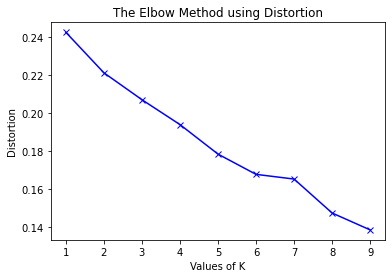

In [124]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

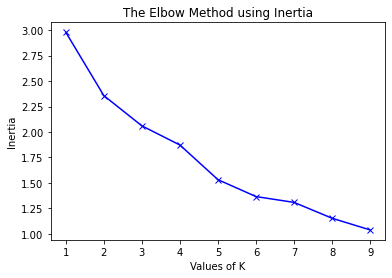

In [125]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [126]:
toronto_coffee = toronto_grouped[["Neighborhood","Coffee Shop"]]

In [159]:
# Setting the number of clusters
kclusters =4
kl_clustering = toronto_coffee.drop(["Neighborhood"], 1)
# Run k-means clustering algorithm
kmeans = KMeans(n_clusters=kclusters,random_state=0).fit(kl_clustering)
# Checking cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 0, 3, 2, 3, 1, 1, 3, 0])

###### We set the number of clusters to 2 and run the algorithm. The K-Means clustering, will help us separate all the neighbourhoods and form different clusters.

Now lets see the amount of Coffee Shops per each particular area

In [160]:
# Creating a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
kl_merged = toronto_coffee.copy()
# Add the clustering labels
kl_merged["Cluster Labels"] = kmeans.labels_
kl_merged.rename(columns={"Neighborhood": "Neighborhood"}, inplace=True)
kl_merged.head(20)

,Neighborhood,Coffee Shop,Cluster Labels
0,Berczy Park,0.090909,1
1,"Brockton, Parkdale Village, Exhibition Place",0.090909,1
2,"Business reply mail Processing Centre, South C...",0.000000,0
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.055556,3
4,Central Bay Street,0.183333,2
5,Christie,0.062500,3
6,Church and Wellesley,0.089744,1
7,"Commerce Court, Victoria Hotel",0.120000,1
8,Davisville,0.058824,3
9,Davisville North,0.000000,0


In [161]:
 # Adding latitude and longitude values to the existing dataframe
kl_merged['Latitude'] = df3['Latitude']
kl_merged['Longitude'] = df3['Longitude']
# Sorting the results by Cluster Labels
kl_merged.sort_values(["Cluster Labels"], inplace=True)
kl_merged

,Neighborhood,Coffee Shop,Cluster Labels,Latitude,Longitude
38,"University of Toronto, Harbord",0.000000,0,43.662744,-79.321558
15,"High Park, The Junction South",0.000000,0,43.668999,-79.315572
20,"Moore Park, Summerhill East",0.000000,0,43.712751,-79.390197
12,"Forest Hill North & West, Forest Hill Road Park",0.000000,0,43.679557,-79.352188
10,"Dufferin, Dovercourt Village",0.000000,0,43.640816,-79.381752
9,Davisville North,0.000000,0,43.669005,-79.442259
16,"India Bazaar, The Beaches West",0.000000,0,43.648198,-79.379817
18,Lawrence Park,0.000000,0,43.728020,-79.388790
27,Roselawn,0.000000,0,43.662696,-79.400049
35,The Beaches,0.000000,0,43.667967,-79.367675


###### Now we have to visualize the clustering results.

In [162]:
# Creating the map
map_clusters = folium.Map(location=[43.651070, -79.347015], zoom_start=11)
# Setting color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array=cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow=[colors.rgb2hex(i) for i in colors_array]
# Add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kl_merged['Latitude'], kl_merged['Longitude'], kl_merged['Neighborhood'], kl_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat,lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

###### Cluster 0 contains area with no Coffee Shops (Red Color)

In [163]:
len(kl_merged.loc[kl_merged['Cluster Labels'] == 0])

12

##### Highest amount of Coffee Shops (Purple Color)

In [164]:
len(kl_merged.loc[kl_merged['Cluster Labels'] == 1])

12

###### Low amount, low competition (Mint green color)

In [165]:
len(kl_merged.loc[kl_merged['Cluster Labels'] == 2])

4

###### Medium Amount of Coffee Shops (Light Brown color)

In [166]:
len(kl_merged.loc[kl_merged['Cluster Labels'] == 3])

11